Author: Ramon Rodriguez



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

myData = pd.read_csv('/Users/ramonrodriguez/Desktop/adult.data.csv')

In [20]:

myData.info()

myData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Employment       32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Educaiton-num    32561 non-null  int64 
 5   Maritial-status  32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital-gains    32561 non-null  int64 
 11  Capital-loss     32561 non-null  int64 
 12  Hours-per-week   32561 non-null  int64 
 13  Naitive Country  32561 non-null  object
 14  Income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Age         Employment  fnlwgt   Education  Educaiton-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

       Maritial-status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital-gains  Capital-loss  Hours-per-week Naitive Country  Income  
0           2174             0              40   United-States   <=50K  
1              0             0              13   United-States   <=50K  
2              0             0              40   United-States   <=50K  
3              0             0              40   United-States   <=50K  
4              0             0              40            Cuba   <=50K

In [21]:
print(myData.isnull().sum())

Age                0
Employment         0
fnlwgt             0
Education          0
Educaiton-num      0
Maritial-status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital-gains      0
Capital-loss       0
Hours-per-week     0
Naitive Country    0
Income             0
dtype: int64


In [22]:
myData.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [23]:
myData.columns

Index(['Age', 'Employment', 'fnlwgt', 'Education', 'Educaiton-num',
       'Maritial-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gains', 'Capital-loss', 'Hours-per-week', 'Naitive Country',
       'Income'],
      dtype='object')

In [24]:
myData2=myData.dropna(axis =0, how='any', thresh =None, subset = None, inplace = False)

In [25]:
print(myData2.isnull().sum())

Age                0
Employment         0
fnlwgt             0
Education          0
Educaiton-num      0
Maritial-status    0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital-gains      0
Capital-loss       0
Hours-per-week     0
Naitive Country    0
Income             0
dtype: int64


In [13]:
myData2.shape

(32561, 14)

In [26]:
myData2.columns

Index(['Age', 'Employment', 'fnlwgt', 'Education', 'Educaiton-num',
       'Maritial-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gains', 'Capital-loss', 'Hours-per-week', 'Naitive Country',
       'Income'],
      dtype='object')

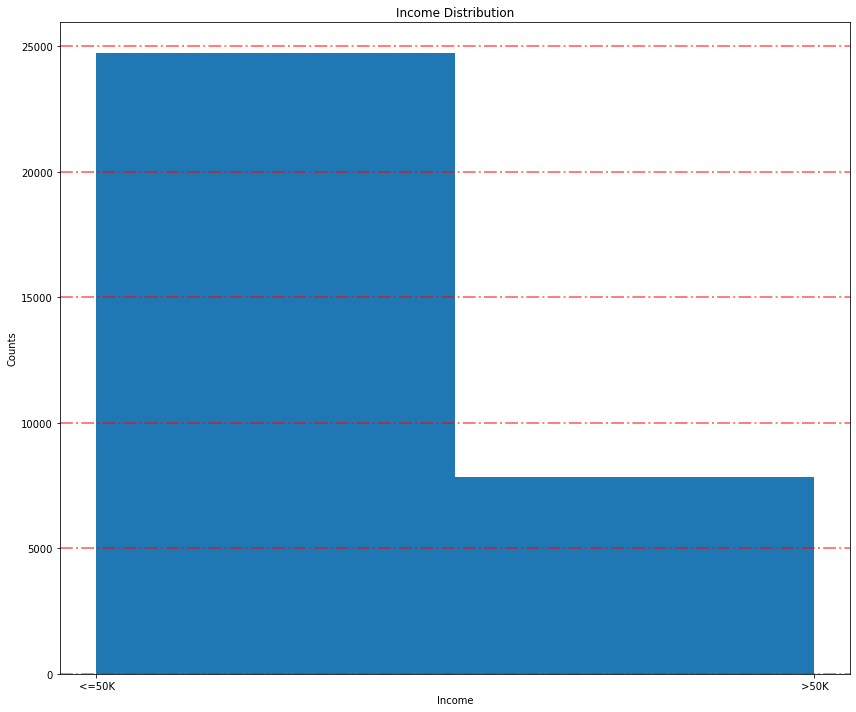

In [27]:

x = myData2.loc[:,'Income']

fig, axs = plt.subplots(1, 1,
                        figsize =(12, 10),
                        tight_layout = True)
axs.hist(x, bins = 2)


plt.grid(axis='y', linestyle ='-.', linewidth = 2, color ='red', alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Counts')
plt.title('Income Distribution')
plt.show()

[Text(0.5, 1.0, 'Income by Education')]

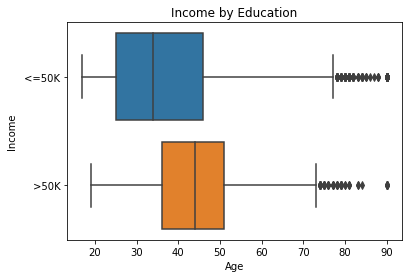

In [28]:


sns.boxplot(data=myData2, x='Age', y = 'Income').set(title='Income by Education')

[Text(0.5, 1.0, 'Education vs Race')]

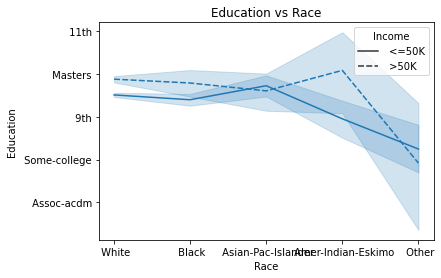

In [29]:

sns.lineplot(data=myData2, x='Race', y = 'Education', style= 'Income').set(title='Education vs Race')

[Text(0.5, 1.0, 'Income vs Education')]

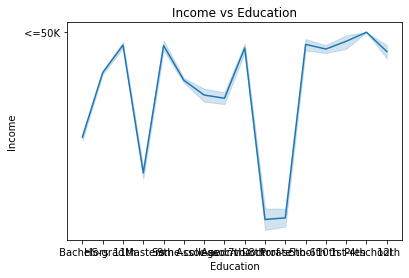

In [31]:
sns.lineplot(data=myData2, x='Education', y = 'Income').set(title='Income vs Education')

[Text(0.5, 1.0, 'Income vs Age')]

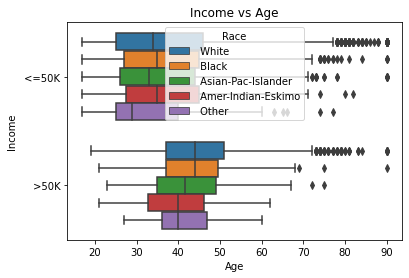

In [32]:
sns.boxplot(data=myData2, x='Age', y = 'Income', hue='Race').set(title='Income vs Age')

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
myData2["Income2"] = ord_enc.fit_transform(myData2[["Income"]])
myData2[["Income", "Income2"]].head(11)

Income  Income2
0    <=50K      0.0
1    <=50K      0.0
2    <=50K      0.0
3    <=50K      0.0
4    <=50K      0.0
5    <=50K      0.0
6    <=50K      0.0
7     >50K      1.0
8     >50K      1.0
9     >50K      1.0
10    >50K      1.0

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
myData2["Race2"] = ord_enc.fit_transform(myData2[["Race"]])
myData2[["Race", "Race2"]].head(11)

Race  Race2
0    White    4.0
1    White    4.0
2    White    4.0
3    Black    2.0
4    Black    2.0
5    White    4.0
6    Black    2.0
7    White    4.0
8    White    4.0
9    White    4.0
10   Black    2.0

In [45]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
myData2["Education2"] = ord_enc.fit_transform(myData2[["Education"]])
myData2[["Education", "Education2"]].head(11)

Education  Education2
0       Bachelors         9.0
1       Bachelors         9.0
2         HS-grad        11.0
3            11th         1.0
4       Bachelors         9.0
5         Masters        12.0
6             9th         6.0
7         HS-grad        11.0
8         Masters        12.0
9       Bachelors         9.0
10   Some-college        15.0

In [62]:
from sklearn import linear_model
df = myData2
x = df[['Education2', 'Race2']]
y = df['Income2']

regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [63]:
#Predicted Income of Black with a bachelors 
predIncome = regr.predict([[9.0,2.0]])
print (predIncome)

[0.24148393]


In [64]:
predIncome = regr.predict([[9.0,4.0]])
print (predIncome)

[0.24148393]
